In [1]:
#importing libraries

import pandas as pd
import seaborn as sns
import os, sys, warnings
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
%matplotlib inline

warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
%matplotlib inline

In [2]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from file_handler import FileHandler
from plots import Plots
plot = Plots()

2022-06-30 15:43:43,743 — FileHandler — DEBUG — Loaded successfully!
2022-06-30 15:43:44,137 — Plot — DEBUG — Loaded successfully!


In [3]:
file_handler = FileHandler()
data_df = file_handler.read_csv("../data/cleaned_data.csv") 

2022-06-30 15:43:44,181 — FileHandler — DEBUG — file read as csv


In [4]:
data_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Select Training Label and Features

In [5]:
# Y includes our labels and X includes our features

Y = data_df['diagnosis']
X = data_df.drop(columns = ['diagnosis'], axis=1)

### Feature Selection- With Correlation

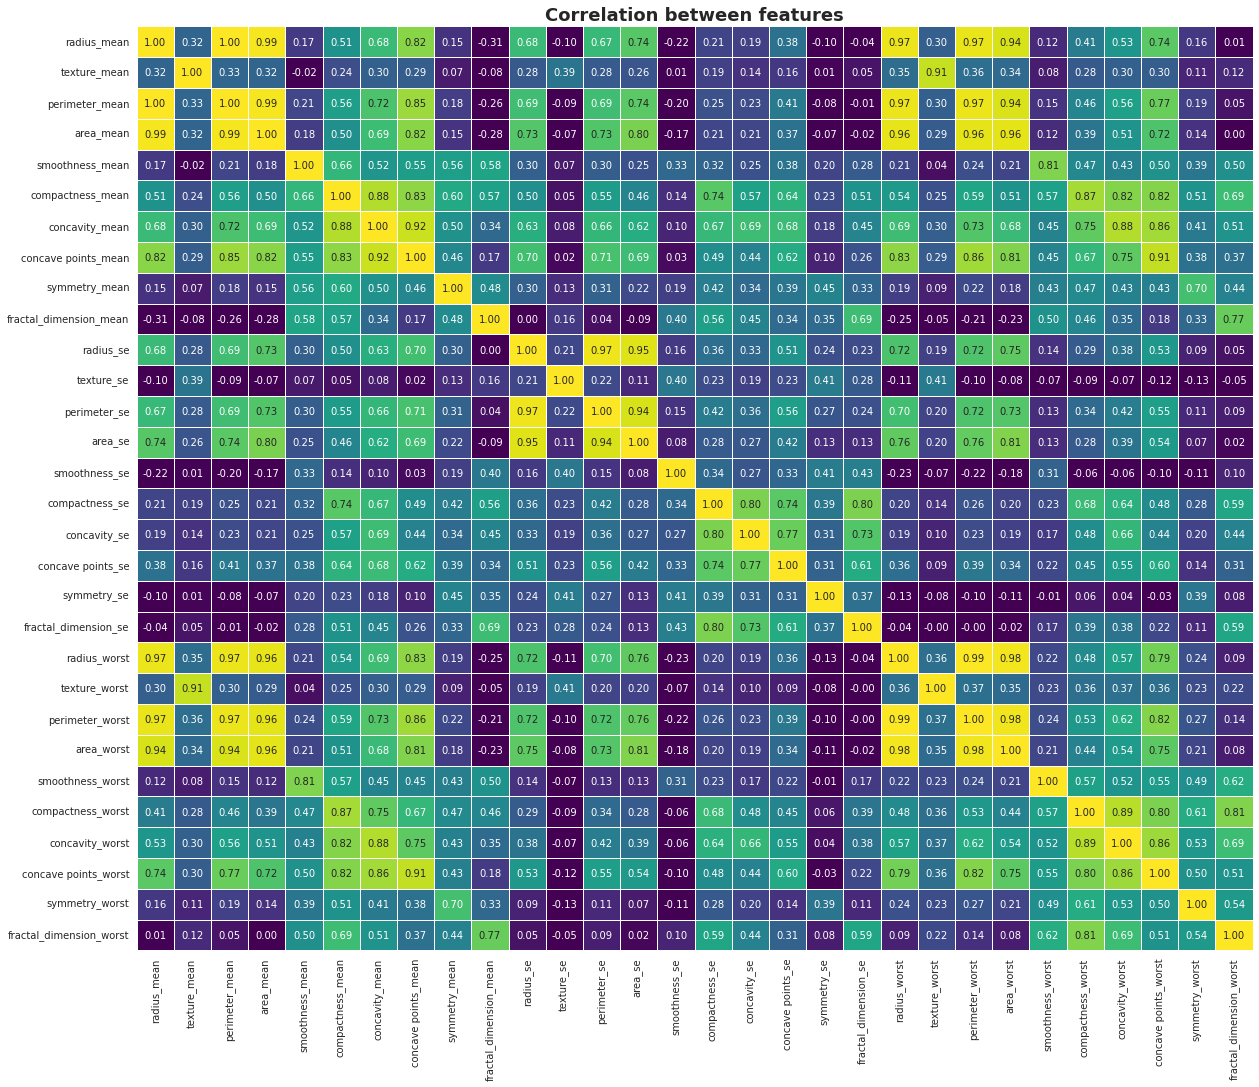

In [6]:
plot.heatmap(data_df, "Correlation between features")

As we discussed on the EDA analysis, since we have a number of features correlation, let's take one of the highly correlated features.

In [7]:
drop_list = ['texture_worst','compactness_mean','concave points_worst','perimeter_mean','radius_mean',\
    'concave points_mean','radius_se', 'perimeter_se','radius_worst','perimeter_worst','compactness_worst',\
    'compactness_se','concave points_se','area_worst']
    
X = X.drop(drop_list,axis = 1 ) 
X.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


Now let's check again our correlation map after dropping highly correlated ones

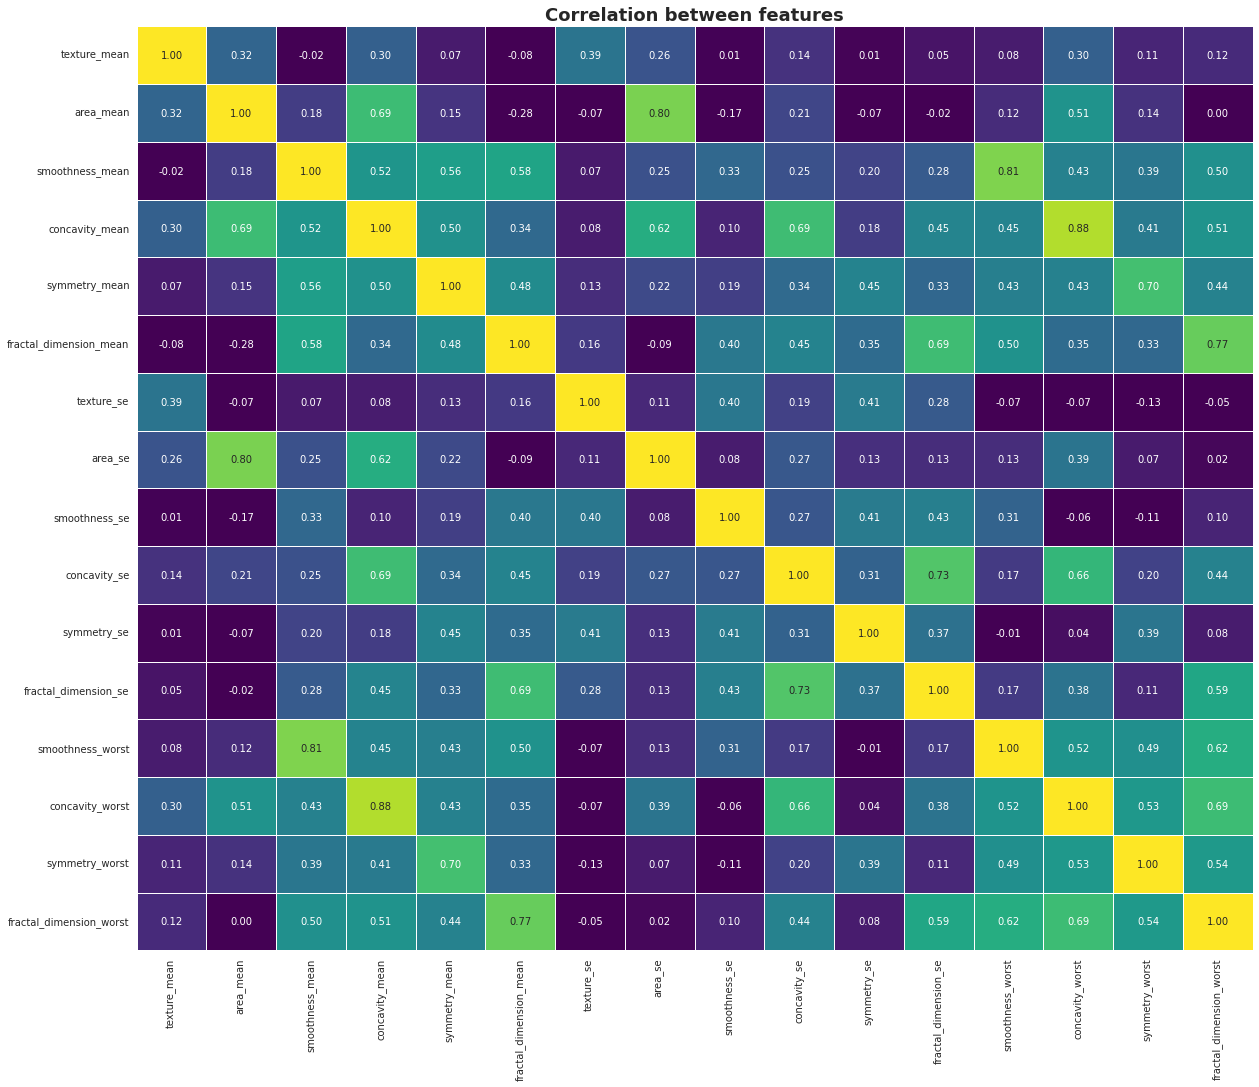

In [8]:
plot.heatmap(X, "Correlation between features")

### Scaling the Data

In [9]:
X = file_handler.scale_and_normalize(X)

In [10]:
X.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,0.012473,0.200238,0.326865,0.387084,0.377848,0.333342,0.066319,0.150735,0.087693,0.074694,0.171563,0.100766,0.330930,0.313024,0.329458,0.230588
1,0.282284,0.519460,0.300207,0.210862,0.393328,0.146357,0.085532,0.130136,0.123640,0.048643,0.087550,0.094356,0.359935,0.199846,0.241911,0.230818
2,0.288110,0.331782,0.379688,0.341449,0.376209,0.155953,0.069619,0.120277,0.111351,0.071439,0.151851,0.093762,0.357010,0.265581,0.298036,0.157567
3,0.145057,0.041368,0.326150,0.227373,0.312057,0.401999,0.070702,0.015338,0.101084,0.057468,0.292715,0.115456,0.368019,0.220554,0.401999,0.311031
4,0.132942,0.415430,0.365388,0.393888,0.321180,0.158615,0.079016,0.138978,0.282188,0.121954,0.115623,0.123791,0.371343,0.271261,0.133725,0.121070
